# Part 2: Probability

## Introduction
In this section, we will utilize Python to review a few core probability theory concepts, and show how we may use Python to visualize these concepts as well.

## Import libraries
In order to utilize some specific mathematical functions in Python, we will need to utilize the `scipy` library, specifically its special functions, `scipy.special`, and its integration capabilities, `scipy.integrate`. We will also need `numpy` again for some math operations. Later on in this section, we will also need the ability to plot graphs, for which we will use `matplotlib.pyplot`. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

## Problems

### 1) Chi-squared probabilities
Here, we are asked to calculate a number of problems regarding the sum of Gaussian variables via the $\chi^2$ probability density function (PDF). Let's run through some helpful facts before we start:

- In each problem, the Gaussian variables have mean $\mu = 0$ and variance $\sigma^2 = 1$. This means the Gaussian variables are standard Normals, referred to as $Z$.
- The sum of $k$ standard Normals is a $\chi^2$ distribution with $k$ degrees of freedom; that is,
$$ \sum_{i=1}^{k}Z^2=\chi^2_k $$
- The PDF of $\chi^2_k$ is defined as
$$ \frac{x^{(k/2)-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)} $$
and we can integrate this function between two values to obtain the probability that the distribution lies between those two values.

Starting on part **(a)**, we are asked to calculate the probability that the sum of the squares of five standard Normals is between $14$ and $15$. Let's use Python to first define the PDF of $\chi^2_k$:

In [ ]:
def pdf(x, k): 
    numerator = x**(k/2-1) * np.exp(-x/2)
    denominator = 2**(k/2) * special.gamma(k/2)
    return numerator / denominator

And now, we can integrate this between $14$ and $15$ when $k=5$:

In [ ]:
# scipy.integrate.quad is scipy's standard definite integral function
int_a = integrate.quad(pdf, 14, 15, args = (5,))

# scipy.integrate.quad returns a tuple containing both the result and an error estime
# Let's isolate the result
print(int_a[0])

Since we defined our PDF in Python with flexible degrees of freedom, we can similarly calculate part **(b)** by switching the arguments of `integrate.quad`:

In [ ]:
# The support of any chi-squared distribution is (0, inf)
# So zero is our lower bound
int_b = integrate.quad(pdf, 0, 0, args = (50,))
print(int_b[0])

Part **(b)** equaling $0$ is rather trival, anyway &mdash; it's impossible that the sum of any squared real-valued distributions would be less than zero.  

Unfortunately, part **(c)** is impossible if we try to use the same approach, as we rapidly run into an overflow error:

In [ ]:
int_c = integrate.quad(pdf, 500, np.inf, args = (500,))

So, let's use this opportunity to show another one of Python's statistical capabilities. `scipy` also has a `stats` subpackage that we can import to work with a $\chi^2$ random variable:

In [2]:
import scipy.stats as stats

# To find the probability that the random variable takes values greater than 500,
# let's subtract the probability that the variable takes values less than 500 from 1

prob_c = 1 - stats.chi2.cdf(500, 500)
print(prob_c)

0.491589373031009


To be sure, we can use the same strategy to ensure our answers to the prior two parts were correct:

In [ ]:
prob_a = stats.chi2.cdf(15, 5) - stats.chi2.cdf(14, 5)
print(int_a[0], prob_a)

prob_b = stats.chi2.cdf(0, 50)
print(int_b[0], prob_b)

Indeed, the results are incredibly close for part **(a)** and identical for part **(b)**. Thus, we can be confident our answers for all three parts are accurate.

### 2) Chi-squared plots
For this portion of the assignment, we have some work to do to interpret the provided MATLAB code in Python. The following block is the most faithful adaptation of the code I could compile in Python:

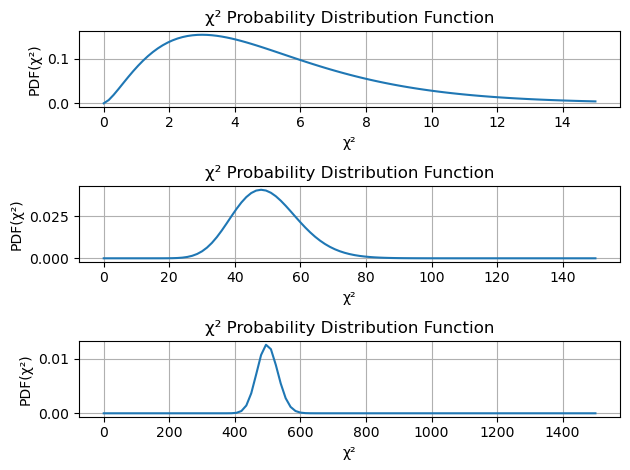

In [7]:
fig, axs = plt.subplots(3, 1)

nus = [5, 50, 500]

for i in range(0, 3, 1):

    nu = nus[i]
    x = np.linspace(0, 3*nu, 101)
    P_x = stats.chi2.pdf(x, nu)
    axs[i].plot(x, P_x)

    # Note that Python does not have built in LaTeX support for matplotlib labels
    axs[i].set_xlabel("χ²")
    axs[i].set_ylabel("PDF(χ²)")
    axs[i].set_title("χ² Probability Distribution Function")
    axs[i].grid(visible = True)

fig.tight_layout()

Now, we're instructed to add our own code, plotting Gaussian distributions with $\mu = \nu$ and $\sigma^2=2\nu$. This code is below, with the Gaussians shown in red:

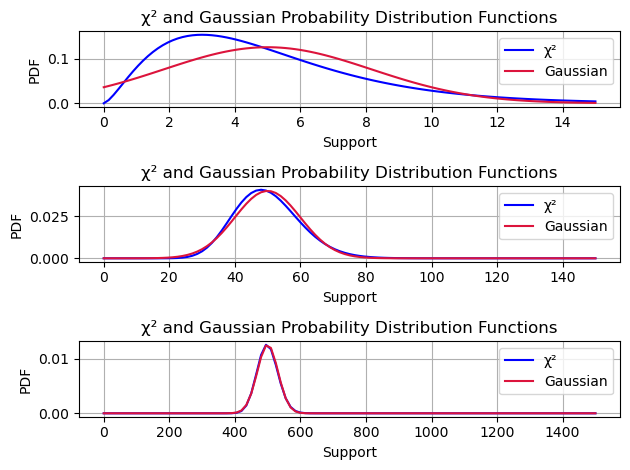

In [11]:
fig, axs = plt.subplots(3, 1)

nus = [5, 50, 500]

for i in range(0, 3, 1):

    nu = nus[i]
    x = np.linspace(0, 3*nu, 101)
    P_x = stats.chi2.pdf(x, nu)
    chi2_plot, = axs[i].plot(x, P_x, color = "blue", label = "χ²")

    gaussian = stats.norm.pdf(x, loc = nu, scale = np.sqrt(2*nu))
    gaussian_plot, = axs[i].plot(x, gaussian, color = "crimson", label = "Gaussian")

    # Note that Python does not have built in LaTeX support for matplotlib labels
    axs[i].set_xlabel("Support")
    axs[i].set_ylabel("PDFs")
    axs[i].set_title("χ² and Gaussian Probability Distribution Functions")
    axs[i].grid(visible = True)
    axs[i].legend()

fig.tight_layout()

The plots show a progressive convergence of the $\chi^2$ PDF to the Gaussian PDF as the degrees of freedom increase; this is the result of a probability concept known as the *Central Limit Theorem*, in which sums of large numbers of random variables can be estimated by a Gaussian distribution.